In [63]:
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('scikit-allel version: %s' %allel.__version__)
print('pandas version: %s' %pd.__version__)
print('numpy version: %s' %np.__version__)

scikit-allel version: 1.3.5
pandas version: 2.0.1
numpy version: 1.23.5


In [64]:
import malariagen_data
print('malariagen_data version %s' %malariagen_data.__version__)
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")
ag3

malariagen_data version 7.5.0


<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
Species analysis        : aim_20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.5.0
Client location         : unknown
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

In [78]:
def plot_coords(
    data,
    x='PC1',
    y='PC2',
    titlex=None,
    titley=None,
    z=None,
    color=None,
    color_map=None,
    color_continuous_scale=None,
    symbol=None,
    symbol_map=None,
    jitter_frac=0.02,
    title=None,
    marker_size=8,
    template='simple_white',
    slug=None,
    random_seed=42,
    show=False,
    ):

    # setup data
    data = data.copy()
    
    # add PC coords as dataframe columns, with jitter if desired
    if jitter_frac:
        np.random.seed(random_seed)
        data[x] = jitter(data[x], jitter_frac)
        data[y] = jitter(data[y], jitter_frac)
        if z:
            data[z] = jitter(data[z], jitter_frac)
    
    # setup common plotting arguments
    scatter_kwargs = dict(
        color=color, 
        color_discrete_map=color_map,
        color_continuous_scale=color_continuous_scale,
        symbol=symbol,
        symbol_map=symbol_map,
        hover_name='sample_id',
        hover_data=[
            'pca_pops',
        ],
        width=850,
        height=650,
        title=title,
        template=template,
    )
        
    
    # hack fixed marker size, 2D only (3D has bugs)
    if marker_size and not z:
        data['size'] = marker_size
        scatter_kwargs['size'] = 'size'
        scatter_kwargs['size_max'] = marker_size
        scatter_kwargs['opacity'] = 0.9

    if z:
        # 3D scatter plot
        fig = px.scatter_3d(data, x=x, y=y, z=z, **scatter_kwargs)
        
    else:
        # 2D scatter plot
        fig = px.scatter(data, x=x, y=y, render_mode='svg', **scatter_kwargs)
        fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = [-150, -100,  -50,    0,   50,  100,  150,  200]))
       # fig.update_layout(
        #    yaxis = dict(
        #    tickmode = 'array',
        #    tickvals = [-150, -100,  -50,    0,   50,  100,  150,  200])) #    
        fig.update_layout(yaxis_range=[-100, 100])
        fig.update_layout(xaxis_range=[-100, 100])
        fig.update_layout(xaxis_title=titlex, yaxis_title=titley)
        fig.update_layout(title_text=title, title_x=0.5)
        fig.update_layout(coloraxis_colorbar=dict(title="AIMs CO Fraction",),
)

    if slug:
        path = f'plot-{slug}-{x}-{y}-{z}-{color}.html'
        fig.write_html(path, include_plotlyjs='cdn')
                
    if show:
        fig.update_layout(legend_orientation="h")
        fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=16),  # Imposta la dimensione del carattere degli xticks
        title_font=dict(size=22)  # Imposta la dimensione del carattere del titolo dell'asse x
    ),
    yaxis=dict(
        tickfont=dict(size=16),  # Imposta la dimensione del carattere degli yticks
        title_font=dict(size=22)  # Imposta la dimensione del carattere del titolo dell'asse y
    ),
            showlegend=False, title_font=dict(size=24)
)
        fig.show()


In [66]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1


pca_symbols_map = {
    'An.gam': 'circle', 
    'An.col': 'circle',
    'gcx2': 'cross',
    'gcx1-GM': 'cross',
    'gcx1-GW': 'cross',
}


species_color_map = {
    'An.gam':  species_palette[19],
    'An.col': species_palette3[0],
    'gcx2': species_palette3[4],
    'gcx1-GM': species_palette[2],
    'gcx1-GW': species_palette2[2],
}

In [67]:
def jitter(a, f):
    r = a.max() - a.min()
    return a + f * np.random.uniform(-r, r, a.shape)

---------------------
## Chromosome 3

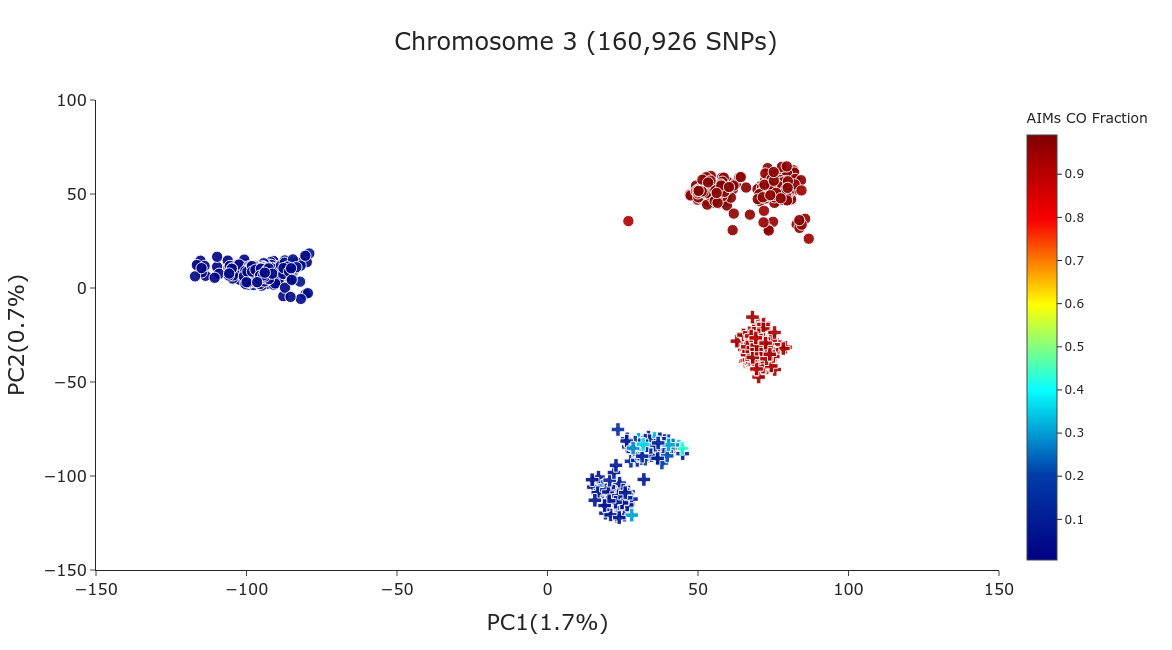

In [45]:
pca_chrom3 = plot_coords(pd.read_csv('../Data/Final/pca_outputs/chr3_pca_final.csv'), x='PC1', y='PC2', title="Chromosome 3 (160,926 SNPs)",
            color='aim_species_fraction_colu_no2l_x',symbol='pca_pops', symbol_map=pca_symbols_map, color_continuous_scale='jet', slug = 'pca',
            show=True, titlex='PC1(1.7%)', titley='PC2(0.7%)')

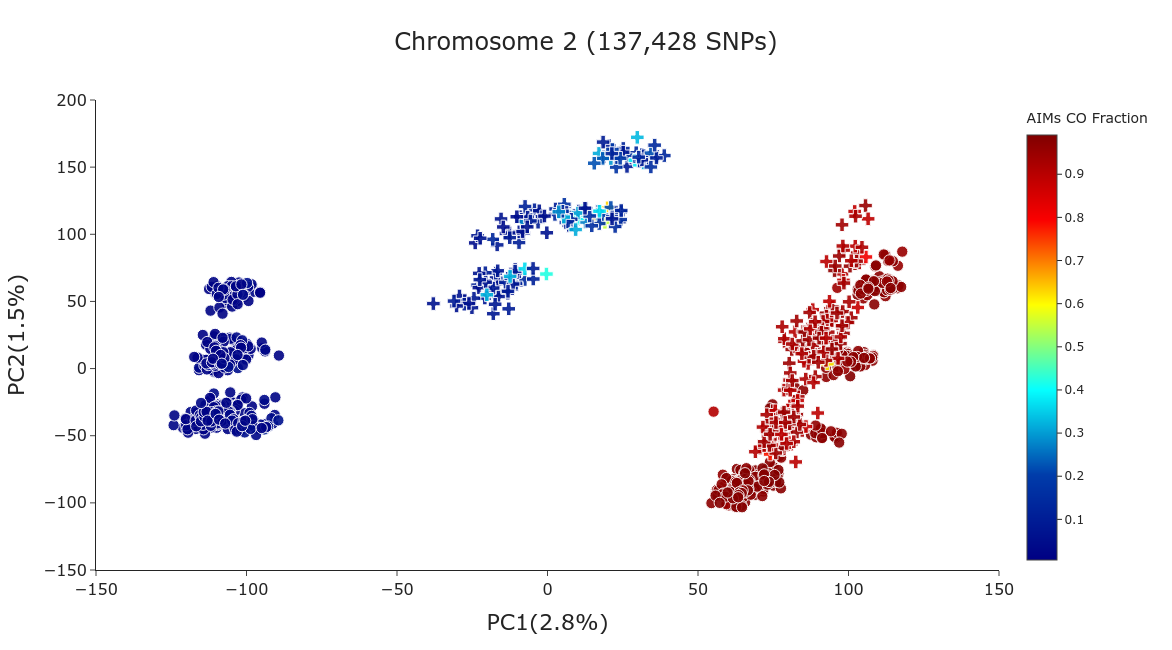

In [62]:
pca_chrom2_all = plot_coords(pd.read_csv('../Data/Final/pca_outputs/chr2_pca_final.csv'), x='PC1', y='PC2', title="Chromosome 2 (137,428 SNPs)",
            color='aim_species_fraction_colu_no2l_x',symbol='pca_pops', symbol_map=pca_symbols_map, color_continuous_scale='jet', slug = 'pca',
            show=True, titlex='PC1(2.8%)', titley='PC2(1.5%)')

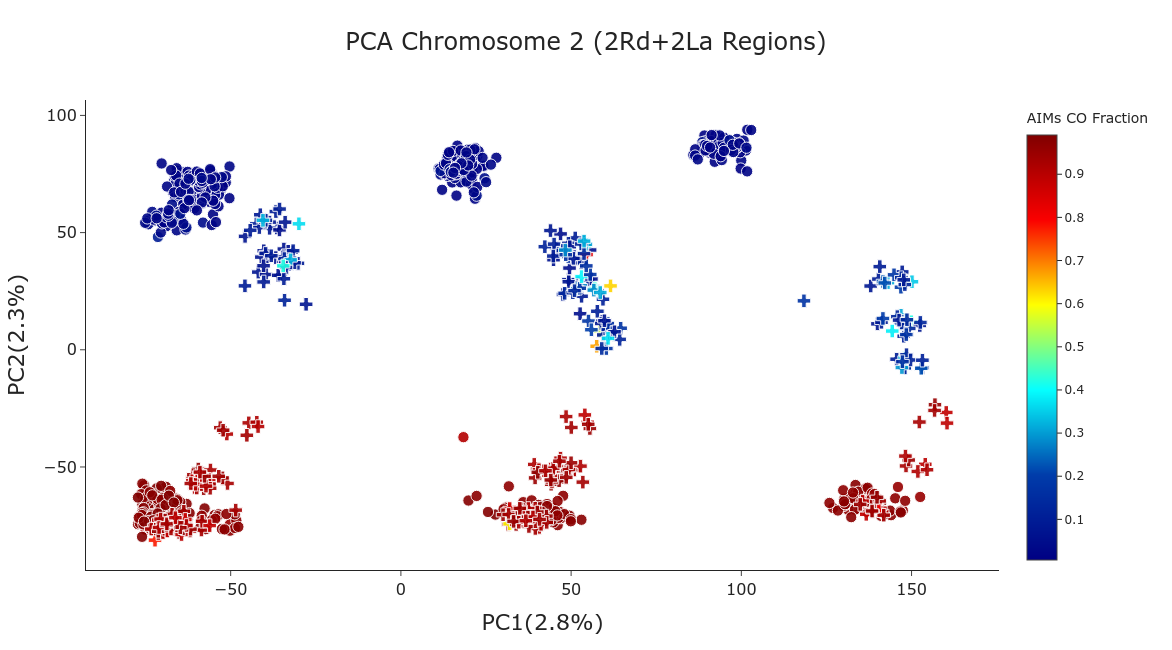

In [72]:
pca_chrom2 = plot_coords(pd.read_csv('../Data/Final/pca_outputs/chr2_pca.csv'), x='PC1', y='PC2', title="PCA Chromosome 2 (2Rd+2La Regions)",
            color='aim_species_fraction_colu_no2l_x',symbol='pca_pops', symbol_map=pca_symbols_map, color_continuous_scale='jet', slug = 'pca',
            show=True, titlex='PC1(2.8%)', titley='PC2(2.3%)')

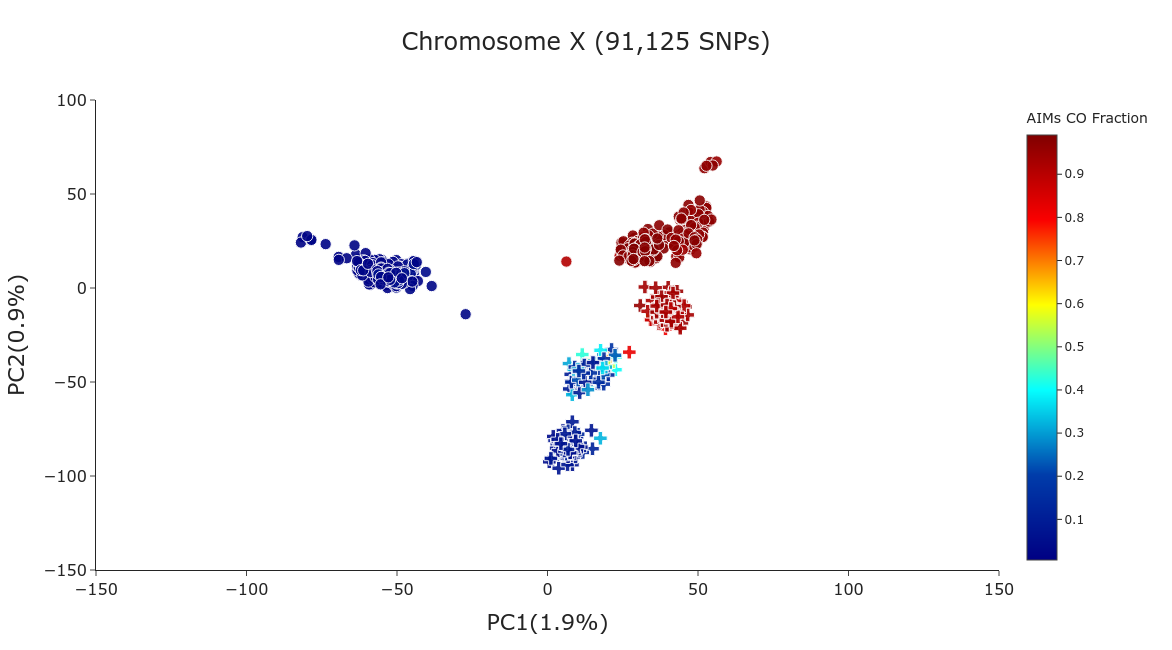

In [50]:
pca_chromx = plot_coords(pd.read_csv('../Data/Final/pca_outputs/chrX_pca_final.csv'), x='PC1', y='PC2', title="Chromosome X (91,125 SNPs)",
            color='aim_species_fraction_colu_no2l_x',symbol='pca_pops', symbol_map=pca_symbols_map, color_continuous_scale='jet', slug = 'pca',
            show=True, titlex='PC1(1.9%)', titley='PC2(0.9%)')

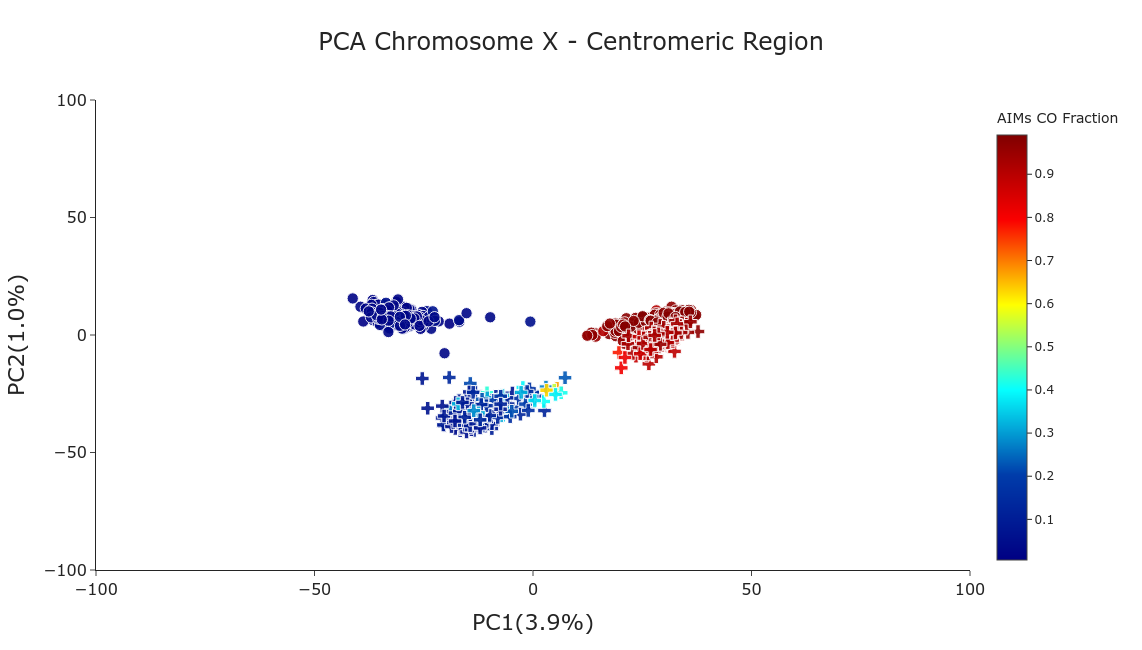

In [82]:
plot_coords(pd.read_csv('../Data/Final/pca_outputs/chrx_island_pca_final.csv'), x='PC1', y='PC2', title="PCA Chromosome X - Centromeric Region",
            color='aim_species_fraction_colu_no2l',symbol='pca_pops', symbol_map=pca_symbols_map, color_continuous_scale='jet', slug = 'pca',
            show=True, titlex='PC1(3.9%)', titley='PC2(1.0%)')